# import required libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report 

# reading data

In [4]:
data = pd.read_csv("C:/Users/ratho/creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# read statistic of the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
#chack any null value in the dataset or not
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# remove the outlier from the dataset 

Note: when remove the outlier then some important data will remove from the dataset

In [10]:
data.quantile(0.10)

Time      35027.000000
V1           -1.893272
V2           -1.359862
V3           -1.802587
V4           -1.656329
V5           -1.302171
V6           -1.167450
V7           -1.078148
V8           -0.458945
V9           -1.294047
V10          -1.032158
V11          -1.289015
V12          -1.148031
V13          -1.280012
V14          -1.003676
V15          -1.173945
V16          -1.059361
V17          -0.804264
V18          -0.976935
V19          -0.985616
V20          -0.389602
V21          -0.367447
V22          -0.867488
V23          -0.328634
V24          -0.870358
V25          -0.606101
V26          -0.548034
V27          -0.211466
V28          -0.155615
Amount        1.000000
Class         0.000000
Name: 0.1, dtype: float64

In [11]:
data.quantile(0.99)

Time      170560.940000
V1             2.237130
V2             3.801811
V3             2.728434
V4             4.248032
V5             3.424903
V6             4.200085
V7             2.696205
V8             2.075973
V9             2.986773
V10            3.253618
V11            2.290583
V12            1.698576
V13            2.513962
V14            2.150300
V15            1.925527
V16            1.874820
V17            2.289928
V18            2.068689
V19            2.262924
V20            2.412190
V21            1.931852
V22            1.530152
V23            1.508703
V24            1.063748
V25            1.203955
V26            1.158698
V27            0.931360
V28            0.541126
Amount      1017.970000
Class          0.000000
Name: 0.99, dtype: float64

In [41]:
# # remove bottom outlier
# data = data[data['Time']>=33706.800000].copy()
# data = data[data['V1']>=-1.508882].copy()
# data = data[data['V2']>=-1.486206].copy()
# data = data[data['V3']>=-1.410910].copy()
# data = data[data['V4']>=-1.617603].copy()
# data = data[data['V5']>=-1.322965].copy()
# data = data[data['V6']>=-1.099560].copy()
# data = data[data['V7']>=-0.977661].copy()
# data = data[data['V8']>=-0.402155].copy()
# data = data[data['V9']>=-1.298221].copy()
# data = data[data['V10']>=-1.010577].copy()
# data = data[data['V11']>=-1.222288].copy()
# data = data[data['V12']>=-1.106228].copy()
# data = data[data['V13']>=-1.301869].copy()
# data = data[data['V14']>=-0.851389].copy()
# data = data[data['V15']>=-1.125406].copy()
# data = data[data['V16']>=-1.070477].copy()
# data = data[data['V17']>=-0.807168].copy()
# data = data[data['V18']>=-1.016704].copy()
# data = data[data['V19']>=-0.995910].copy()
# data = data[data['V20']>=-0.368247].copy()
# data = data[data['V21']>=-0.356346].copy()
# data = data[data['V22']>=-0.356346].copy()
# data = data[data['V23']>=-0.339546].copy()
# data = data[data['V24']>=-0.922008].copy()
# data = data[data['V25']>=-0.624889].copy()
# data = data[data['V26']>=-0.568492].copy()
# data = data[data['V27']>=-0.173587].copy()
# data = data[data['V28']>=-0.122017].copy()
# data = data[data['Amount']>=1.500000].copy()
# data = data[data['Class']>=0.000000].copy()

In [42]:
# #remove upper outlier data
# data = data[data['Time']<=157640.400000].copy()
# data = data[data['V1']<=2.007012].copy()
# data = data[data['V2']<=1.279502].copy()
# data = data[data['V3']<=1.676173].copy()
# data = data[data['V4']<=1.482807].copy()
# data = data[data['V5']<=1.407893].copy()
# data = data[data['V6']<=1.509365].copy()
# data = data[data['V7']<=1.039387].copy()
# data = data[data['V8']<=0.769381].copy()
# data = data[data['V9']<=1.301671].copy()
# data = data[data['V10']<=1.119759].copy()
# data = data[data['V11']<=1.318588].copy()
# data = data[data['V12']<=1.017274].copy()
# data = data[data['V13']<=1.251841].copy()
# data = data[data['V14']<=1.251841].copy()
# data = data[data['V15']<=1.124211].copy()
# data = data[data['V16']<=0.990879].copy()
# data = data[data['V17']<=0.908617].copy()
# data = data[data['V18']<=0.908617].copy()
# data = data[data['V19']<=0.953833].copy()
# data = data[data['V20']<=0.444593].copy()
# data = data[data['V21']<=0.376155].copy()
# data = data[data['V22']<=0.914883].copy()
# data = data[data['V23']<=0.339286].copy()
# data = data[data['V24']<=0.705404].copy()
# data = data[data['V25']<=0.600903].copy()
# data = data[data['V26']<=0.688947].copy()
# data = data[data['V27']<=0.265368].copy()
# data = data[data['V28']<=0.265368].copy()
# # data = data[data['Amount']<=203.000000].copy()
# # data = data[data['Class']<=0.000000].copy()

{'whiskers': [<matplotlib.lines.Line2D at 0x1706131e250>,
 'caps': [<matplotlib.lines.Line2D at 0x1706131e910>,
 'boxes': [<matplotlib.lines.Line2D at 0x17061428eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1706131efd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1706132b370>],
 'means': []}

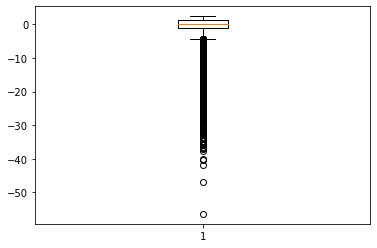

In [12]:
# plt.boxplot(data['Time'])
plt.boxplot(data['V1'])

# check the class imbalanced problem

<AxesSubplot:>

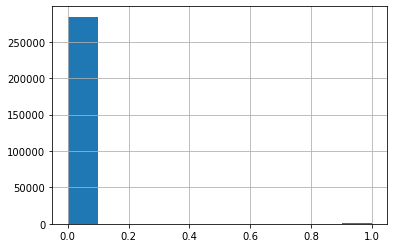

In [13]:
#class inbalance problem
data['Class'].value_counts()
data['Class'].hist()

# check the correlation of the input data with the target value

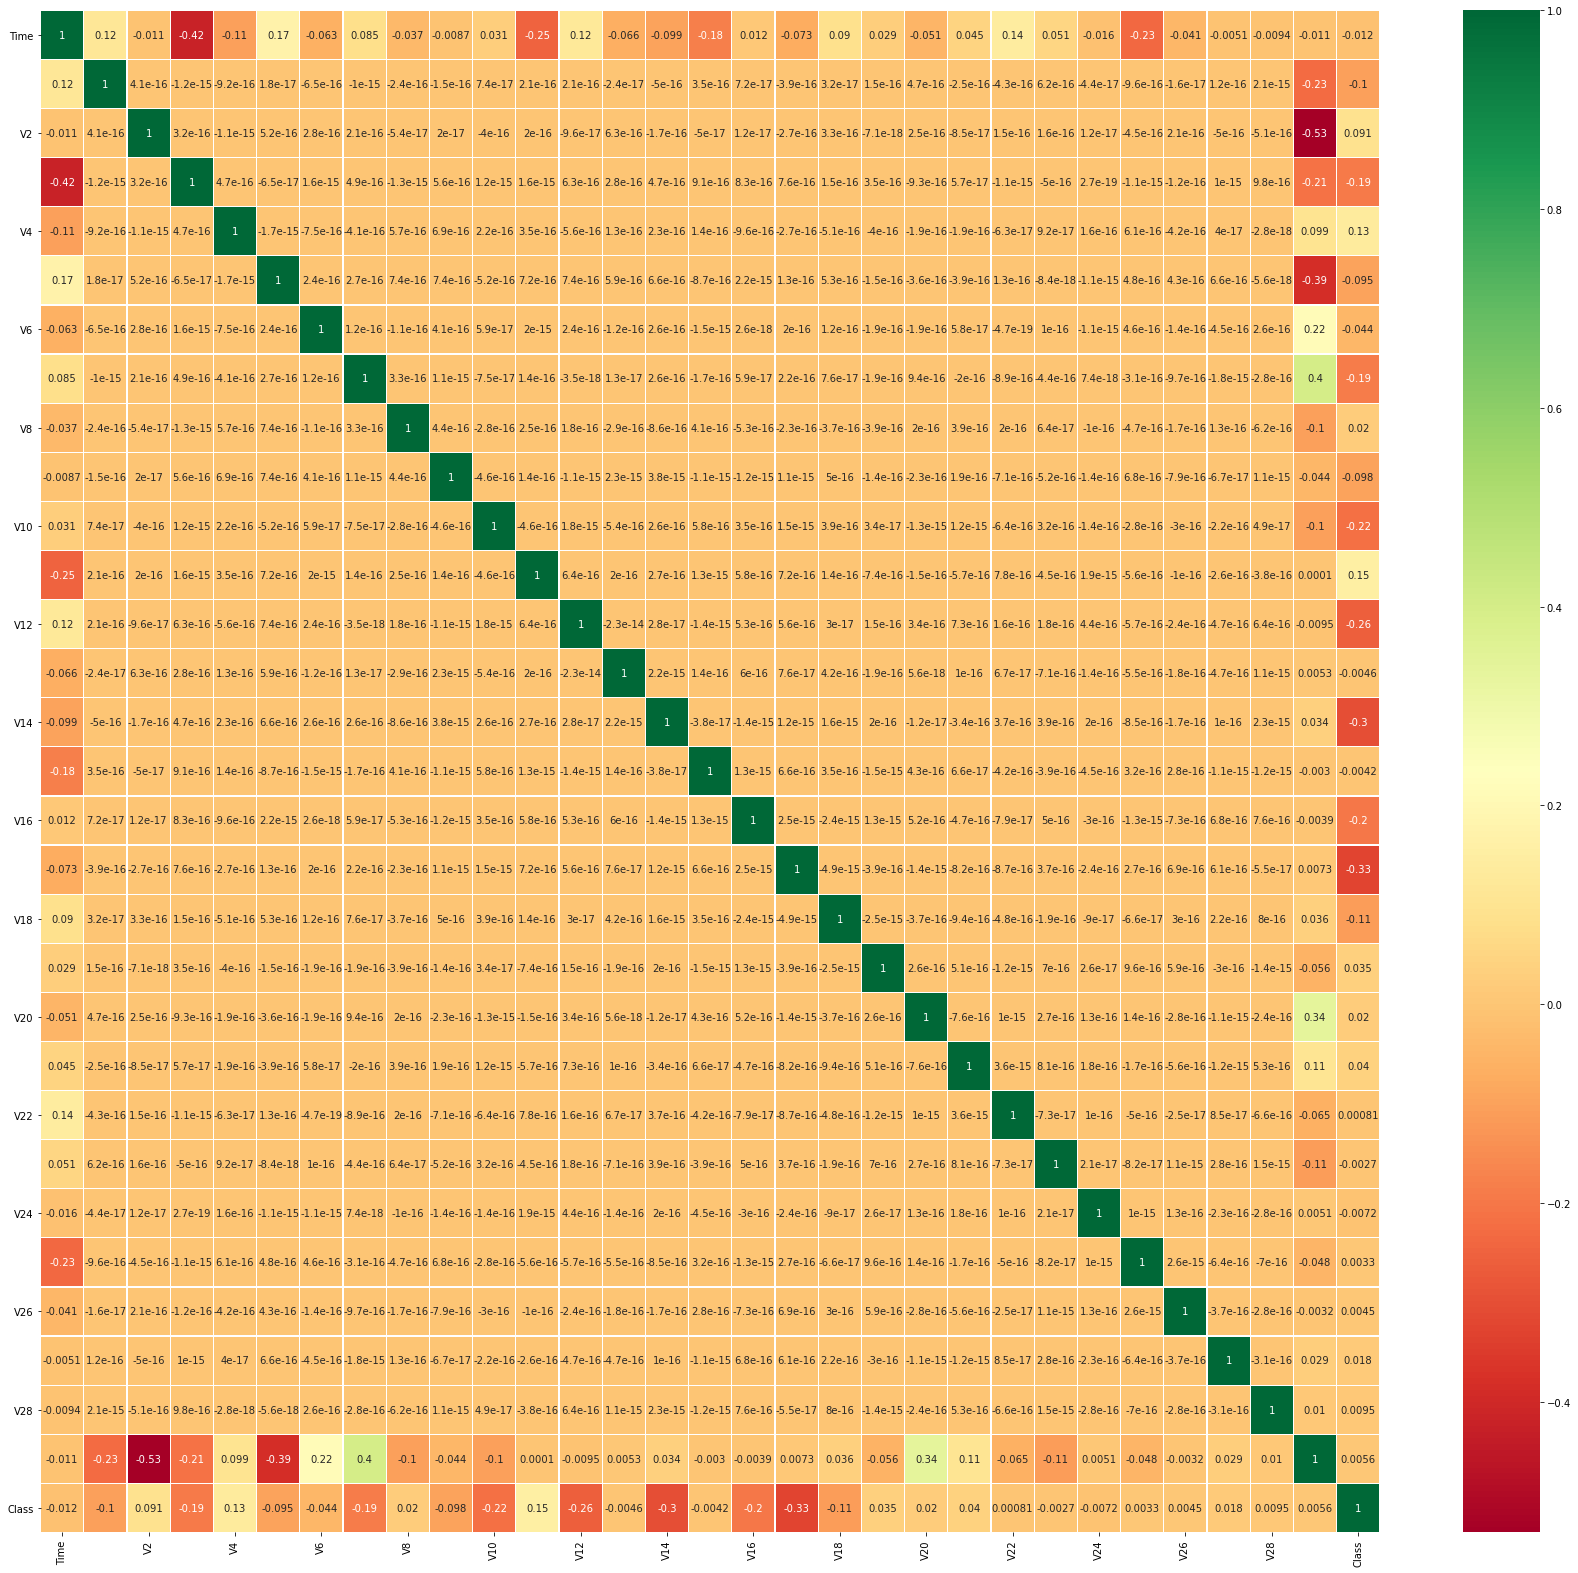

In [14]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(30,28)
plt.show()

# remove less corelat column

In [15]:
# data = data.drop(columns=['V3'])
# data = data.drop(columns=['V10'])
data = data.drop(columns=['V12'])
data = data.drop(columns=['V14'])
data = data.drop(columns=['V17'])

# check the normal distribution of the data over target value

Time
-0.03556743068120296


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


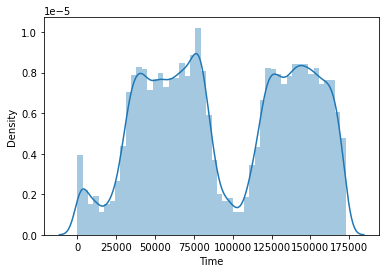

V1
-3.280650024359956


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


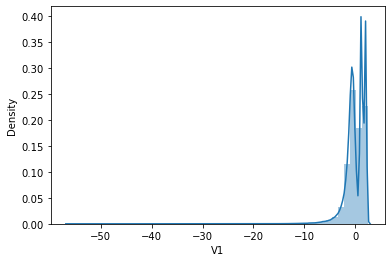

V2
-4.624841215356954


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


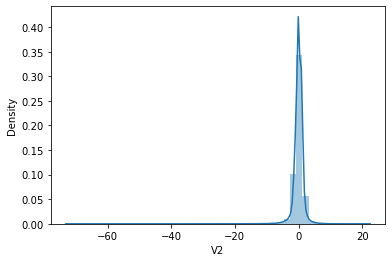

V3
-2.2401436419416543


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


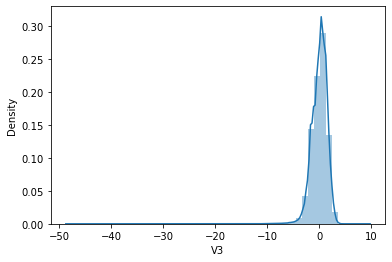

V4
0.6762885361363855


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


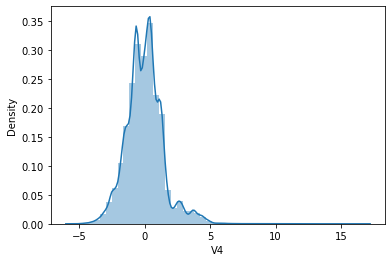

V5
-2.425888719378559


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


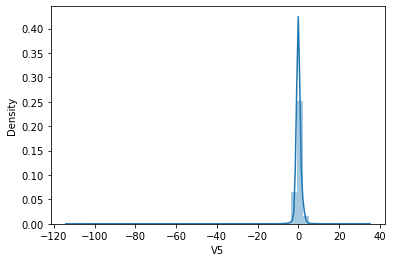

V6
1.8265710448869008


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


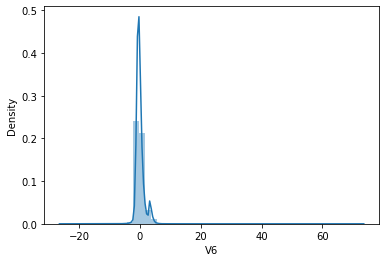

V7
2.5538939666831117


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


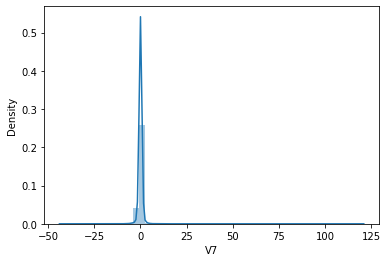

V8
-8.521899311980174


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


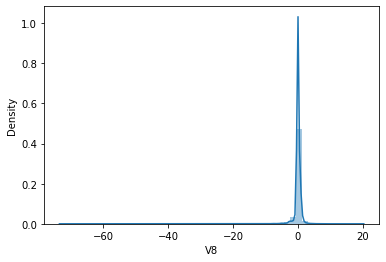

V9
0.5546768505565418


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


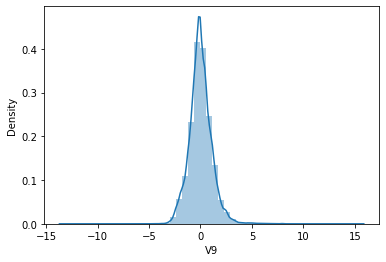

V10
1.1871343376109695


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


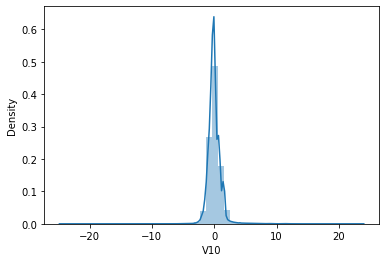

V11
0.35650397786795557


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


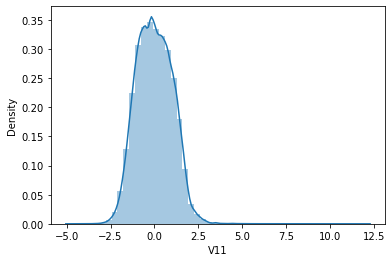

V13
0.0652331143394307


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


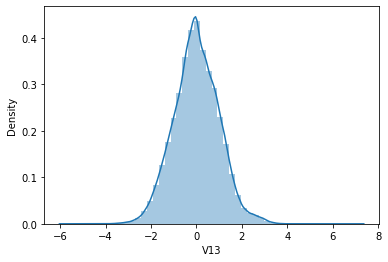

V15
-0.3084213577546761


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


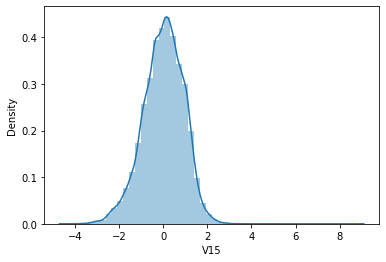

V16
-1.1009604775565411


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


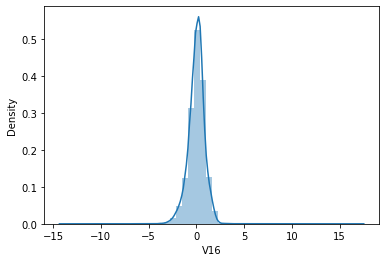

V18
-0.2598788993745328


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


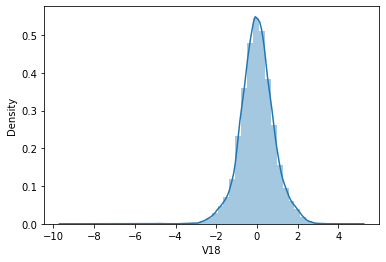

V19
0.109191184897714


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


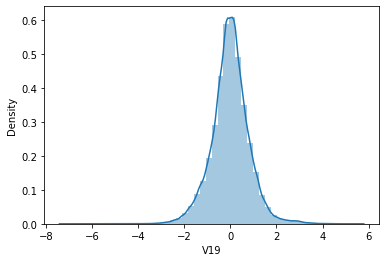

V20
-2.0371445699300117


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


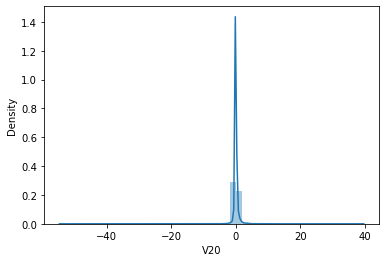

V21
3.5929722697554753


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


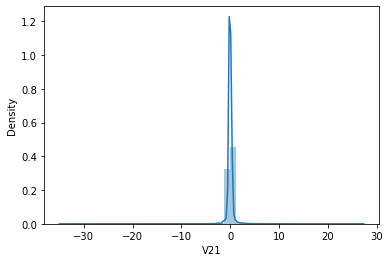

V22
-0.21325649967250146


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


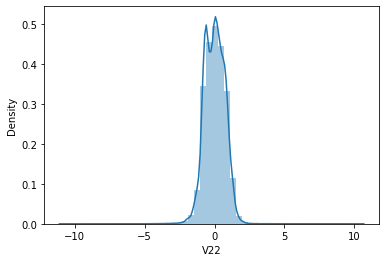

V23
-5.875109397316075


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


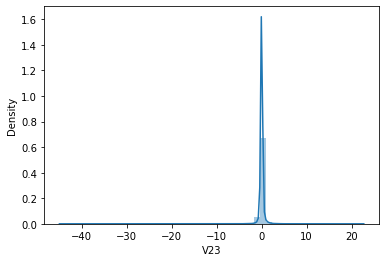

V24
-0.5524963913014509


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


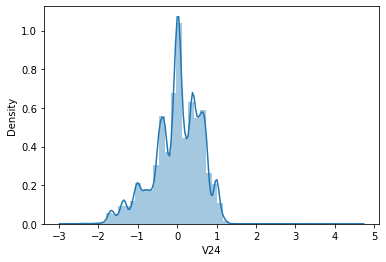

V25
-0.41579040044741566


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


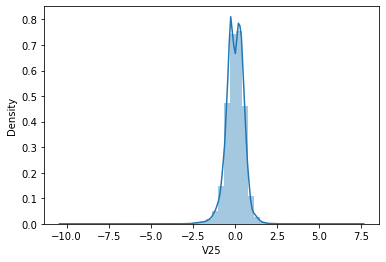

V26
0.5766895799228516


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


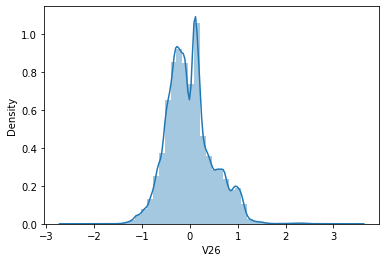

V27
-1.170202779255609


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


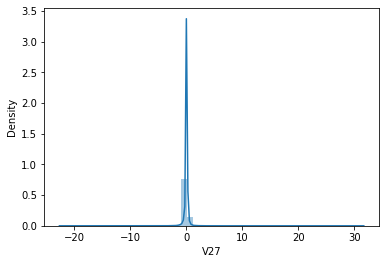

V28
11.19203224646587


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


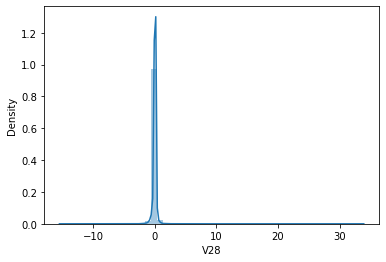

Amount
16.97763503663315


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


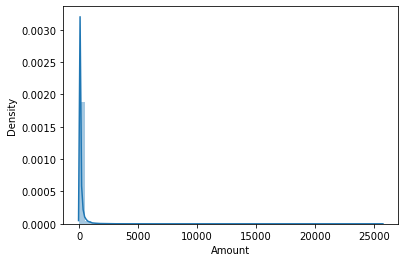

Class
23.99745292182408


C:\Users\ratho\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


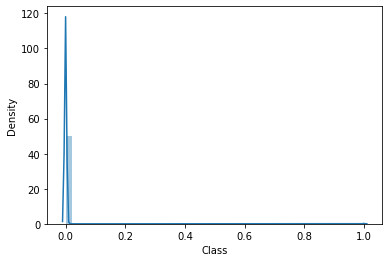

In [47]:
for col in data:
    print(col)
    print(skew(data[col]))
    plt.figure()
    sns.distplot(data[col])
    plt.show()

In [16]:
y = data['Class']
data=data.drop(columns=['Class'])

# apply PCA because the data is so large and model take more time to train

In [17]:
pca = PCA(n_components=4)

principalComponents = pca.fit_transform(data)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2','pc3','pc4'])

In [18]:
principalDf

,pc1,pc2,pc3,pc4
0,94813.862880,55.979516,0.742928,-0.330187
1,94813.854643,-90.953570,-1.443265,0.447086
2,94812.875662,285.024876,0.257534,-0.579078
3,94812.861399,29.859945,0.456051,-0.482731
4,94811.858413,-23.651830,0.852629,0.563643
...,...,...,...,...
284802,-77972.145229,-83.234921,14.104729,10.013585
284803,-77973.143808,-59.208661,1.010071,-1.270678
284804,-77974.141489,-16.118649,-1.408142,0.194564
284805,-77974.144657,-73.998844,0.643274,0.107586


# apply the smote to handle the class imbalance problem

array([[<AxesSubplot:title={'center':'Class'}>]], dtype=object)

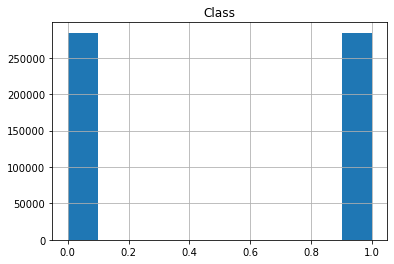

In [19]:
sm = SMOTE(random_state = 42)

x_res , y_res = sm.fit_resample(principalDf,y)
x_res = pd.DataFrame(x_res)
y_res = pd.DataFrame(y_res)

y_res.hist()

# split the training and testing data

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.20,random_state=41)

# apply min_max normalization

In [53]:
# scaler = MinMaxScaler()
# x_train=scaler.fit_transform(x_train)
# x_test=scaler.transform(x_test)

# apply defferent model to get the best accuracy

In [21]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=31)
neigh.fit(x_train,y_train)
y_pred = neigh.predict(x_test) 
accuracy = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred) 
f1 = f1_score(y_test, y_pred) 
# neigh.score(x_test,y_test)
report = classification_report(y_test, y_pred) 
print("KNN Classification Report:") 
print(report) 


C:\Users\ratho\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87     56875
           1       0.85      0.91      0.88     56851

    accuracy                           0.87    113726
   macro avg       0.88      0.87      0.87    113726
weighted avg       0.88      0.87      0.87    113726



In [30]:
from sklearn.tree import DecisionTreeClassifier as DT
DTmodel = DT(max_depth=4)
DTmodel.fit(x_train, y_train)
# DTmodel.score(x_test,y_test)
y_pred = DTmodel.predict(x_test) 
accuracy = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred) 
f1 = f1_score(y_test, y_pred) 
# neigh.score(x_test,y_test)
report = classification_report(y_test, y_pred) 
print("DecisionTreeClassifier Report:") 
print(report) 

DecisionTreeClassifier Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     56875
           1       0.92      0.90      0.91     56851

    accuracy                           0.91    113726
   macro avg       0.91      0.91      0.91    113726
weighted avg       0.91      0.91      0.91    113726



In [27]:
from xgboost import XGBClassifier


model = XGBClassifier(n_estimators=121)
model.fit(x_train, y_train)
y_pred = model.predict(x_test) 
accuracy = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred) 
f1 = f1_score(y_test, y_pred) 
# neigh.score(x_test,y_test)
report = classification_report(y_test, y_pred) 
print("XGBoost classifier Report:") 
print(report)
# model.score(x_test,y_test)

XGBoost classifier Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     56875
           1       0.98      0.99      0.98     56851

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



In [57]:
# !pip install mlxtend

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state =41)

rf.fit(x_train,y_train)
y_pred = rf.predict(x_test) 
accuracy = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred) 
f1 = f1_score(y_test, y_pred) 
# neigh.score(x_test,y_test)
report = classification_report(y_test, y_pred) 
print("Rendom forest classifier Report:") 
print(report)
# rf.score(x_test,y_test)

<ipython-input-31-76dcd60dbacf>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


Rendom forest classifier Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56875
           1       0.99      1.00      0.99     56851

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



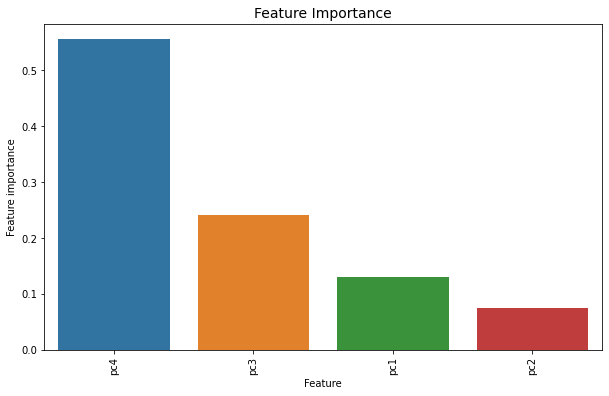

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


tmp = pd.DataFrame({'Feature': x_train.columns, 'Feature importance': rf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.title('Feature Importance', fontsize=14)
sns.barplot(x='Feature', y='Feature importance', data=tmp)
plt.xticks(rotation=90)
plt.show()


In [32]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
xgb = XGBClassifier()
dt = DT()
rf = RandomForestClassifier()
KNN = KNeighborsClassifier()
clf_stack = StackingClassifier(classifiers = [xgb, dt,rf], meta_classifier = lr, use_probas = True, use_features_in_secondary = True)

In [33]:
model_stack = clf_stack.fit(x_train, y_train)   # training of stacked model
# pred_stack = model_stack.predict(x_test)  
y_pred = clf_stack.predict(x_test) 
accuracy = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred) 
f1 = f1_score(y_test, y_pred) 
# neigh.score(x_test,y_test)
report = classification_report(y_test, y_pred) 
print("Stacking classifier Report:") 
print(report)

C:\Users\ratho\anaconda3\lib\site-packages\mlxtend\classifier\stacking_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Stacking classifier Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     56875
           1       0.99      0.99      0.99     56851

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



In [34]:
from sklearn.metrics import accuracy_score
acc_stack = accuracy_score(y_test, pred_stack)  # evaluating accuracy
print('accuracy score of Stacked model:', acc_stack * 100)

NameError: name 'pred_stack' is not defined